In [1]:
%matplotlib inline
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers

# 載入 MNIST 數據集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255

# 設定批次和epochs
batch_sizes = [32, 128, 512]
epochs_list = [5, 15, 30]

results = []

for batch_size in batch_sizes:
    for epochs in epochs_list:
        # 建立模型
        model = keras.Sequential([
            layers.Dense(512, activation="relu"),
            layers.Dense(10, activation="softmax")
        ])
        model.compile(optimizer="rmsprop",
                      loss="sparse_categorical_crossentropy",
                      metrics=["accuracy"])
        
        # 訓練並計時
        start_time = time.time()
        history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, verbose=1)
        end_time = time.time()
        
        # 評估模型
        test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
        train_time = end_time - start_time
        
        # 記錄結果
        results.append([batch_size, epochs, train_time, test_acc])
        print(f"Batch size: {batch_size}, Epochs: {epochs}, Time: {train_time:.2f}s, Test Acc: {test_acc:.4f}")

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 273us/sample - loss: 0.2016 - accuracy: 0.9406
Epoch 2/5
60000/60000 [==============================] - 15s 257us/sample - loss: 0.0901 - accuracy: 0.9743
Epoch 3/5
60000/60000 [==============================] - 15s 255us/sample - loss: 0.0655 - accuracy: 0.9815
Epoch 4/5
60000/60000 [==============================] - 18s 297us/sample - loss: 0.0517 - accuracy: 0.9857
Epoch 5/5
10000/10000 [==============================] - 1s 107us/sample - loss: 0.0957 - accuracy: 0.9786
Batch size: 32, Epochs: 5, Time: 82.10s, Test Acc: 0.9786
Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 16s 275us/sample - loss: 0.2020 - accuracy: 0.9406
Epoch 2/15
60000/60000 [==============================] - 15s 257us/sample - loss: 0.0889 - accuracy: 0.9739- loss: 0.0894 - accuracy: 
Epoch 3/15
60000/60000 [==============================] - 16s 259us/sample - loss: 0.0648 - accuracy: 0.9819
Epo

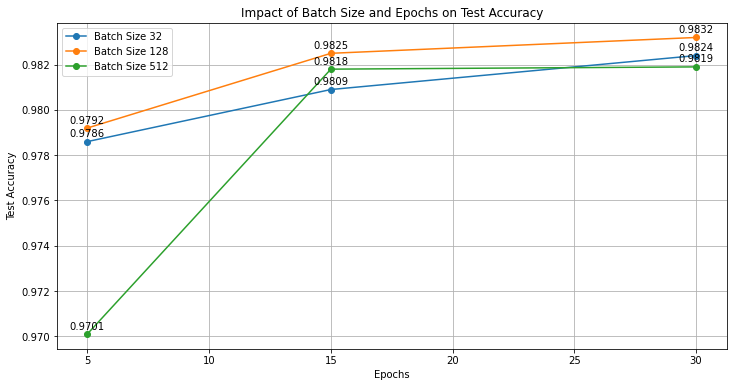

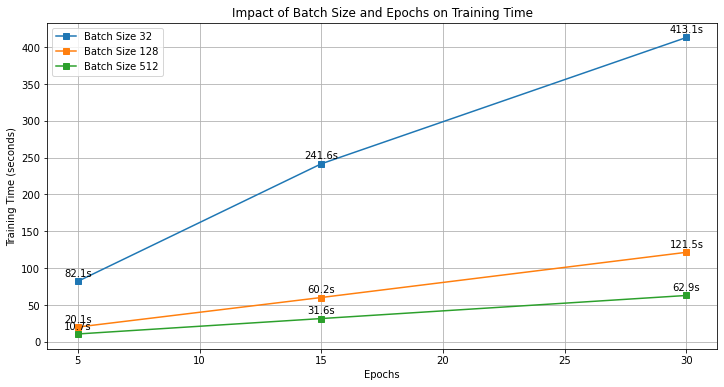

In [2]:
# 轉換為 NumPy 陣列
results = np.array(results, dtype=object)

# 確保 results 有數據
if len(results) == 0:
    print("No results recorded!")
else:
    # 繪製 Test Accuracy 圖表
    plt.figure(figsize=(12, 6))
    for batch_size in batch_sizes:
        subset = np.array([r for r in results if r[0] == batch_size], dtype=object)
        plt.plot(subset[:, 1].astype(int), subset[:, 3].astype(float), marker='o', label=f'Batch Size {int(batch_size)}')
        for i, txt in enumerate(subset[:, 3]):  # 標記數據點
            plt.annotate(f"{txt:.4f}", (subset[i, 1], subset[i, 3]), textcoords="offset points", xytext=(0,5), ha='center')

    plt.xlabel("Epochs")
    plt.ylabel("Test Accuracy")
    plt.title("Impact of Batch Size and Epochs on Test Accuracy")
    plt.legend()
    plt.grid()
    plt.savefig("Impact of Batch Size and Epochs on Test Accuracy.png")  # 存成圖片
    plt.show()

    # 繪製 Training Time 圖表
    plt.figure(figsize=(12, 6))
    for batch_size in batch_sizes:
        subset = np.array([r for r in results if r[0] == batch_size], dtype=object)
        plt.plot(subset[:, 1].astype(int), subset[:, 2].astype(float), marker='s', label=f'Batch Size {int(batch_size)}')
        for i, txt in enumerate(subset[:, 2]):  # 標記數據點
            plt.annotate(f"{txt:.1f}s", (subset[i, 1], subset[i, 2]), textcoords="offset points", xytext=(0,5), ha='center')

    plt.xlabel("Epochs")
    plt.ylabel("Training Time (seconds)")
    plt.title("Impact of Batch Size and Epochs on Training Time")
    plt.legend()
    plt.grid()
    plt.savefig("Impact of Batch Size and Epochs on Training Time.png")  # 存成圖片
    plt.show()